In [1]:
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA,PLSCanonical,PLSRegression
import matplotlib.pyplot as plt

load one-week experience-related data from Wangkai.

In [2]:
driver_exp_0 = pd.read_csv('driver_exp_features_1_15.csv')
driver_exp_1 = pd.read_csv('driver_exp_features_16_70.csv')
driver_exp_2 = pd.read_csv('driver_exp_features_70PLUS.csv')

load one-week(post)income-related data for drivers from Lipan

In [3]:
driver_income0 = pd.read_table('data_0730_0805.txt')
driver_income1 = pd.read_table('data_0806_0812.txt')

load security label data from Nick.rao

In [4]:
unsafe = pd.read_table('0912_driver_mirror_case_cnt_0806_30d.csv', encoding='gbk', sep=',')

In [5]:
unsafe.head()

,driver_id,mirror_total_ord_dcnt,renshang_ord_dcnt,xingsaorao_ord_dcnt,sunhuicaiwu_ord_dcnt,shilian_ord_dcnt,cusi_ord_dcnt,qiangjie_ord_dcnt,daoqie_ord_dcnt,bangjiaqiaozha_ord_dcnt,shedu_ord_dcnt,weiguiyunxing_ord_dcnt,qianzaifengxian_ord_dcnt,weixie_ord_dcnt,shipinanquan_ord_dcnt,weixieanquan_ord_dcnt
0,580542545253297,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,567950132367235,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,565931240067699,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,566437054391715,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,563348738670594,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
unsafe.shape

(2519, 16)

In [7]:
driver_income0.head()

,city_id,driver_id,online_time_avg,iph,tph,online_time_std,iph_std,tph_std
0,1,562950053805082,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,562950053934600,1.591667,39.326702,0.628272,0.141667,3.130802,0.056366
2,1,562950054408618,10.844444,63.006762,1.321721,1.278406,3.023289,0.593122
3,1,562950054466944,1.233333,46.045946,1.297297,1.097927,19.540659,0.361714
4,1,562950054486958,4.066667,43.924590,2.090164,2.473096,12.092422,0.387330


In [8]:
print(driver_income0.shape)
print(driver_exp_0.shape[0]+driver_exp_1.shape[0]+driver_exp_2.shape[0])

(3143263, 8)
2825534


In [9]:
expall = pd.concat([driver_exp_0,driver_exp_1,driver_exp_2])
ids = expall.driver_id
expall.shape

(2825534, 159)

In [10]:
expall.head()

,driver_id,cnt_respond_orders_7d,cnt_pinche_orders_7d,cnt_appointment_orders_7d,cnt_morning_peak_orders_7d,cnt_normal_peak_orders_7d,cnt_evening_peak_orders_7d,cnt_cancel_orders_7d,cnt_cancel_by_p_orders_7d,cnt_grab_after_cancel_by_p_orders_7d,...,cnt_driver_star_feedback_5star_7d,cnt_passenger_complaint_7d,cnt_passenger_complaint_result_succeed_7d,cnt_passenger_complaint_result_failed_7d,cnt_driver_complaint_7d,cnt_driver_complaint_result_succeed_7d,cnt_driver_complaint_result_failed_7d,cnt_questionary_comment_order_7d,cnt_questionary_comment_positive_answer_7d,cnt_questionary_comment_negative_answer_7d
0,580542259157740,1,0,0,1.0,NaN,NaN,0,NaN,NaN,...,0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN
1,580542259165490,3,0,1,2.0,1.0,NaN,3,2.0,2.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,580542259165990,14,0,0,5.0,9.0,NaN,5,5.0,5.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
3,580542259166070,1,0,0,NaN,1.0,NaN,0,NaN,NaN,...,0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN
4,580542259170593,3,1,0,NaN,3.0,NaN,2,1.0,1.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [11]:
(unsafe.shape[0]/expall.shape[0])*100 #采样极不均衡怎么处理，是否需要对负样本进行抽样或加权重调节？

0.08915128963233145

In [12]:
y = pd.merge(pd.DataFrame(ids),unsafe,on='driver_id',how='left')
y.head()

,driver_id,mirror_total_ord_dcnt,renshang_ord_dcnt,xingsaorao_ord_dcnt,sunhuicaiwu_ord_dcnt,shilian_ord_dcnt,cusi_ord_dcnt,qiangjie_ord_dcnt,daoqie_ord_dcnt,bangjiaqiaozha_ord_dcnt,shedu_ord_dcnt,weiguiyunxing_ord_dcnt,qianzaifengxian_ord_dcnt,weixie_ord_dcnt,shipinanquan_ord_dcnt,weixieanquan_ord_dcnt
0,580542259157740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,580542259165490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580542259165990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,580542259166070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,580542259170593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
y.shape

(2825534, 16)

In [14]:
expall.fillna(0, inplace=True)

In [15]:
x = expall.iloc[:, 1:]

In [16]:
y.fillna(0,inplace=True)

In [17]:
x.dtypes

cnt_respond_orders_7d                                    int64
cnt_pinche_orders_7d                                     int64
cnt_appointment_orders_7d                                int64
cnt_morning_peak_orders_7d                             float64
cnt_normal_peak_orders_7d                              float64
cnt_evening_peak_orders_7d                             float64
cnt_cancel_orders_7d                                     int64
cnt_cancel_by_p_orders_7d                              float64
cnt_grab_after_cancel_by_p_orders_7d                   float64
cnt_grab_before_cancel_by_p_orders_7d                  float64
cnt_cancel_by_d_orders_7d                              float64
cnt_cancel_final_result_driver_duty_7d                 float64
cnt_cancel_by_p_final_result_driver_duty_7d            float64
cnt_cancel_by_d_final_result_driver_duty_7d            float64
cnt_cancel_result_is_reduce_driver_deal_rate_7d        float64
cnt_cancel_result_is_reduce_driver_service_score_7d    

下面试试RF和RF映射后采用LR的方法。Kfold交叉验证。

In [18]:
from sklearn.ensemble import (RandomTreesEmbedding,RandomForestClassifier,GradientBoostingClassifier)
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import cross_validation

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
y.columns

Index(['driver_id', 'mirror_total_ord_dcnt', 'renshang_ord_dcnt',
       'xingsaorao_ord_dcnt', 'sunhuicaiwu_ord_dcnt', 'shilian_ord_dcnt',
       'cusi_ord_dcnt', 'qiangjie_ord_dcnt', 'daoqie_ord_dcnt',
       'bangjiaqiaozha_ord_dcnt', 'shedu_ord_dcnt', 'weiguiyunxing_ord_dcnt',
       'qianzaifengxian_ord_dcnt', 'weixie_ord_dcnt', 'shipinanquan_ord_dcnt',
       'weixieanquan_ord_dcnt'],
      dtype='object')

In [20]:
# train with RF model
n_estimator = 200
rf = RandomForestClassifier(max_depth=3,n_estimators=n_estimator,n_jobs=-1,verbose=1)
yall = (y.mirror_total_ord_dcnt>0)*1.0
ysex = ((y.xingsaorao_ord_dcnt+y.weixie_ord_dcnt+y.weixieanquan_ord_dcnt)>0)*1.0
rf.fit(x,ysex)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [21]:
# The random forest model by itself
from sklearn.metrics import roc_auc_score
y_pred_rf = rf.predict_proba(x)[:,1]
fpr_rf, tpr_rf,_ = roc_curve(yall, y_pred_rf)
auc = roc_auc_score(ysex,y_pred_rf)
print(auc)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   10.3s finished


0.8206872561900664


In [22]:
fi = pd.DataFrame(x.columns)
fi.columns = ['Feature']
fi['importance'] = pd.Series(rf.feature_importances_)
fi.sort_values(by='importance', ascending=False).head(10)

,Feature,importance
96,cnt_appeal_service_score_7d,0.045921
152,cnt_driver_complaint_7d,0.037060
100,cnt_appeal_service_score_2nd_7d,0.036717
73,cnt_appeal_orders_7d,0.036049
28,sum_empty_drive_distance_7d,0.030711
31,cnt_fee_objection_orders_7d,0.028694
144,cnt_driver_star_feedback_1star_7d,0.028357
47,sum_fee_objection_correction_amount_fujiafei_7d,0.023223
25,cnt_empty_drive_compensate_orders_platform_cos...,0.023025
67,cnt_fee_objection_process_type_confirm_no_issu...,0.021908


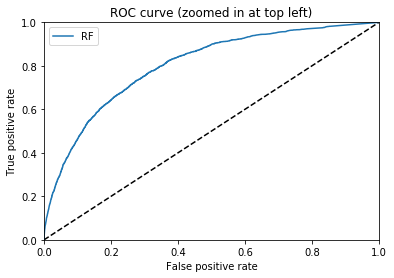

In [23]:
# plot ROC curve
plt.xlim(0,1)
plt.ylim(0.0,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [24]:
# cross validation with K-fold
n_estimator = 200
rf = RandomForestClassifier(max_depth=3,n_estimators=n_estimator,n_jobs=-1,verbose=1)
kf = cross_validation.KFold(yall.shape[0],n_folds=4)
for train_index, test_index in kf:
    #print(train_index)
    X_train,X_test = x.iloc[train_index], x.iloc[test_index]
    y_train,y_test = ysex[train_index],ysex[test_index]
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test,y_pred_rf)
    print(auc)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


0.6116207865180083


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.3s finished


0.787108791680605


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.4s finished


0.7612231880392061


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.4s finished


0.7530449621248453


试试随机森林映射，将样本分层产出one hot encoding，供Logistic Regression使用。

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [26]:
%%time
rt = RandomTreesEmbedding(max_depth=2,n_estimators=100,random_state=0,n_jobs=-1)
rt_lm = LogisticRegression()
pipeline = make_pipeline(rt,rt_lm)
pipeline.fit(X_train,y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred_rf)
print(auc)

0.7530449621248453
CPU times: user 1min 43s, sys: 49 s, total: 2min 32s
Wall time: 2min 34s


In [27]:
def RFLR(X_train,y_train,X_test,y_test):
    rt = RandomTreesEmbedding(max_depth=2,n_estimators=50,random_state=0,n_jobs=-1)
    rt_lm = LogisticRegression()
    pipeline = make_pipeline(rt,rt_lm)
    pipeline.fit(X_train,y_train)
    y_pred_rt = pipeline.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test,y_pred_rt)
    print(auc)

In [28]:
%%time
kf = cross_validation.KFold(ysex.shape[0], n_folds=5, shuffle=True)
for train_index, test_index in kf:
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = ysex[train_index], ysex[test_index]
    RFLR(X_train,y_train,X_test,y_test)

0.738885875239736
0.7320044539752343
0.7224994225122002
0.7391912347544028
0.6811478819266831
CPU times: user 4min 3s, sys: 1min 59s, total: 6min 2s
Wall time: 5min 58s


In [43]:
%%time
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



X_train, X_train_lr, y_train, y_train_lr = train_test_split(x,ysex, test_size=0.5)

params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3, 'verbose':1}

grd = GradientBoostingClassifier(**params)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train,y_train)
grd_enc.fit(grd.apply(X_train)[:,:,0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:,:,0]),y_train_lr)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0045          -0.0002           22.48m
         2           0.0046          -0.0001           21.14m
         3           0.0049           0.0000           20.89m
         4           0.0048          -0.0000           21.31m
         5           0.0046          -0.0001           20.99m
         6           0.0042     -140431.0256           20.77m
         7           0.0042          -0.0000           20.66m
         8      140431.2290           0.0000           20.31m
         9      140431.2287           0.0000           20.04m
        10           0.0045           0.0000           19.77m
        20           0.0047           0.0000           18.70m
        30      140431.2287          -0.0000           17.65m
        40           0.0041           0.0000           16.78m
        50      140431.2288           0.0000           15.87m
        60      140431.2287          -0.0000           14.99m
       

In [44]:
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:,:,0]))[:,1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test,y_pred_grd_lm)
auc = roc_auc_score(y_test,y_pred_grd_lm)
print(auc)

0.8240336873864864


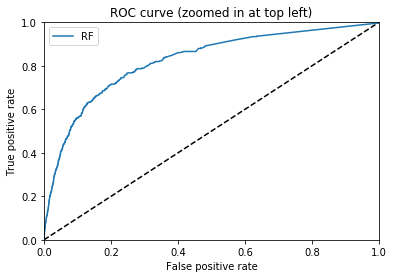

In [45]:
plt.xlim(0,1)
plt.ylim(0.0,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_grd_lm,tpr_grd_lm,label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

find the best number of estimators

In [46]:
X_train,X_test, y_train, y_test = train_test_split(x,ysex,test_size=0.5, random_state=0)

In [47]:
def heldout_score(grd,X_test,y_test):
    score = np.zeros((200,), dtype=np.float64)
    for i,y_pred in enumerate(grd.staged_decision_function(X_test)):
        score[i] = grd.loss_(y_test,y_pred)
    return score

In [48]:
from sklearn import ensemble
from sklearn.model_selection import KFold
def cv_estimate(n_splits=3):
    kf = cross_validation.KFold(ysex.shape[0], n_folds=3, shuffle=True)
    cv_grd = ensemble.GradientBoostingClassifier(**params)
    val_scores = np.zeros((200,),dtype=np.float64)
    for train_index, test_index in kf:
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = ysex[train_index], ysex[test_index]
        cv_grd.fit(X_train, y_train)
        val_scores += heldout_score(cv_grd,X_test,y_test)
    val_scores /= n_splits
    return val_scores

In [49]:
cv_score = cv_estimate(3)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0046          -0.0001           34.87m
         2           0.0048          -0.0002           30.76m
         3           0.0052           0.0001           29.62m
         4           0.0049           0.0000           28.90m
         5           0.0047           0.0000           29.03m
         6           0.0049          -0.0001           29.01m
         7           0.0049           0.0000           28.89m
         8           0.0049           0.0000           28.79m
         9           0.0048           0.0000           28.81m
        10           0.0048           0.0000           28.70m
        20           0.0046           0.0000           26.89m
        30           0.0043           0.0000           25.27m
        40           0.0045           0.0000           23.63m
        50           0.0045           0.0000           22.08m
        60           0.0043           0.0000           20.53m
       

In [50]:
cv_score

array([0.00505563, 0.0050508 , 0.00491712, 0.00491092, 0.00490593,
       0.00493621, 0.0049612 , 0.00496262, 0.00495606, 0.00495006,
       0.00494543, 0.00495141, 0.00494606, 0.00494144, 0.00493685,
       0.00493362, 0.00492867, 0.00492423, 0.00492005, 0.00491616,
       0.00492153, 0.00492073, 0.00491791, 0.00491392, 0.00491478,
       0.00491159, 0.00494174, 0.00493919, 0.00493118, 0.0049287 ,
       0.00492663, 0.00492324, 0.00492737, 0.00492529, 0.00492302,
       0.00492086, 0.00491892, 0.00491665, 0.00491392, 0.00491125,
       0.0049092 , 0.00490724, 0.00490485, 0.004902  , 0.00489941,
       0.00491596, 0.00491344, 0.00491621, 0.00491463, 0.00492003,
       0.00491861, 0.00491671, 0.00491524, 0.00491284, 0.00491093,
       0.00490939, 0.00490786, 0.00490641, 0.00490498, 0.00490307,
       0.00490062, 0.00489896, 0.00489765, 0.00489622, 0.00489547,
       0.00489571, 0.0048943 , 0.00489323, 0.00489203, 0.00489039,
       0.00488917, 0.00488879, 0.00488742, 0.00488652, 0.00488

In [51]:
x = np.arange(200) + 1
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

In [52]:
cv_best_iter

166

In [56]:
y_test.shape

(1412767,)

In [59]:
params2 = {'n_estimators': 166, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3, 'verbose':1}

grd2 = GradientBoostingClassifier(**params2)
grd2.fit(X_train,y_train)
y_pred_grd2 = grd2.predict_proba(X_test)[:,1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test,y_pred_grd2)
auc = roc_auc_score(y_test,y_pred_grd2)
print(auc)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0046          -0.0003           17.94m
         2           0.0047          -0.0000           17.63m
         3           0.0048          -0.0000           18.18m
         4           0.0048           0.0000           18.10m
         5           0.0048     -196171.3409           17.62m
         6           0.0049           0.0001           17.31m
         7      196171.6232           0.0000           17.12m
         8           0.0048           0.0000           17.27m
         9      196171.6232           0.0000           17.15m
        10           0.0049           0.0000           17.19m
        20      196171.6226           0.0000           16.06m
        30      196171.6233           0.0000           14.79m
        40      196171.6231           0.0000           13.62m
        50           0.0050           0.0000           12.51m
        60      196171.6225           0.0000           11.37m
       

进行PLS回归，求解x和y的分解，分解后的因子作为特征输入。

In [ ]:
from sklearn.model_selection import train_test_split
x1, x2, y1, y2 = train_test_split(x,ysex, test_size=0.2)

In [ ]:
%%time
pls2 = PLSRegression(n_components=7) # PLS regression is particularly suited when the matrix of predictors has more variables than observations, and when there is multicollinearity among X values. By contrast, standard regression will fail in these cases (unless it is regularized). 
pls2.fit(x1,y1)

In [ ]:
%%time
x0_r, y0_r = pls2.transform(x1,y1)
print(x0_r.shape)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
%%time
svd = TruncatedSVD(n_components=50)
svd.fit(x1)
u = svd.transform(x1)

In [ ]:
for i in range(7):
    print(np.corrcoef(y1.T, x0_r[:, i].T)[0, 1])

In [ ]:
X_train.head()

In [ ]:
rts = RandomTreesEmbedding(max_depth=2,n_estimators=50,random_state=0,n_jobs=-1)
X_transformed = rts.fit_transform(X_train)

In [ ]:
#print (xx.toarray()[:-10])
#a = xx.toarray()
#print(sum(a[0]))
#print(sum(a[1]))
#rts.decision_path(X_train.iloc[:5])

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

In [ ]:
X_train

In [ ]:
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X_train, X_train, c=y_train, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, s=5, edgecolor='k')
ax.set_title("Truncated SVD reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

In [ ]:
y_train.sum()/len(y_train)

In [ ]:
yy = ysex[ysex==1]
yy.shape

In [ ]:
for i in np.arange(100):
    i = np.random.choice(yy.index, 500)

In [ ]:
len(i)

In [ ]:
choices = np.zeros((5000,))
for i in np.arange(5000):
    choices[i] = np.random.choice(yy.index,1)

In [ ]:
choices

In [ ]:
np.arange(1,5)

In [ ]:
choices = pd.DataFrame(np.zeros((500,)))

In [ ]:
ysex.shape

In [ ]:
x.shape

In [ ]:
sample = ysex[ysex==1]
sample.shape

In [ ]:
tp_sample = sample.sample(10000,replace=True)

In [ ]:
subset = x.sample(10000,replace=False)